In [2]:
!pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=a25ca5bf99394f2fe8e79279a87fb3450df7429e2e0170f95c7eb1a75bb30b8e
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [4]:
from keras.models import load_model
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
model = load_model('Epilepsy.h5')

In [6]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
X=df.values

In [8]:
X=X[:,1:-1]

In [10]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y= to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [27]:
X_train = X_train.reshape(-1,178,1)
X_train = X_train.astype(np.float32)
X_test = X_test.reshape(-1,178,1)
X_test = X_test.astype(np.float32)

X_train.shape
X_test.shape

(2300, 178, 1)

In [14]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

72/72 [==============================] - 5s 32ms/step


(2300, 5)

In [15]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [16]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [17]:
yp.shape

(2300,)

In [18]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [19]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [20]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [21]:
np.unique(yo)

array([0., 1.])

In [22]:
np.unique(yp)

array([0., 1.])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(yo,yp)

0.9908695652173913

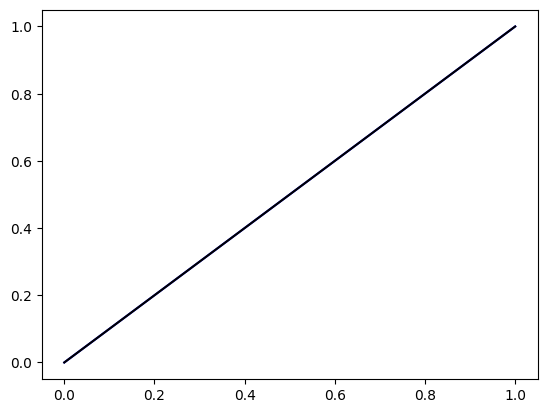

In [25]:
plt.plot(np.unique(yo),'b')
plt.plot(np.unique(yp), 'black')


plt.show()

In [28]:
ypred1=model.predict((X_train[:,::4]-X_train.mean())/X_train.std())
ypred1.shape

288/288 [==============================] - 10s 34ms/step


(9200, 5)

In [29]:
yp1=np.zeros((Y_train.shape[0]))
yo1=np.ones((Y_train.shape[0]))

In [30]:
for i in range(Y_train.shape[0]):
    yp1[i]=np.argmax(ypred1[i])+1
    yo1[i]=np.argmax(Y_train[i])

In [31]:
yp1.shape

(9200,)

In [32]:
yo1.shape

(9200,)

In [33]:
np.unique(yo1)

array([1., 2., 3., 4., 5.])

In [34]:
np.unique(yp1)

array([1., 2., 3., 4., 5.])

In [35]:
#conversion of classes
for i in range(Y_train.shape[0]):
    if yo1[i]!=1:
        yo1[i]=0
    if yp1[i]!=1:
        yp1[i]=0

In [36]:
np.unique(yo1)

array([0., 1.])

In [37]:
np.unique(yp1)

array([0., 1.])

In [38]:
accuracy_score(yo1,yp1)

0.9989130434782608